# $\color{green}{\text{AI computed Wind and TKE for drone operations for parts of Oslo city.}}$


## $\color{red}{\text{Purpose: Demonstration of model for research purpose for EU AI4HyDROP project.}}$

### The AI model is trained to predict urban scale wind and turbulence on a segment of Oslo city (as marked by yellow borders in the image below.)


## $\color{red}{\text{User Input and AI Output:}}$
### User provides only date_and_hrs_only for prediction in format '2024-05-18 09:00:00'. User can also provide drone trajectory in this urban landscape.

### User gets the wind and turbulence in the Oslo segment using AI.
### User then can use provided functions to obtain the wind and turbulence values in Drone Flight path (both absolute and normalized).
### User can also use to find the locations with maximum turbulence and maximum wind speed to enable decision on corridor


## $\color{red}{\text{About AI model and its Limitations }}$: 
### The AI model used below is trained to operate with input wind direction at a give time as obtained from meso-scale weather forecasting model.
### The users takes inputs (wind direction) from meso-scale weather model for a particular date and hour,
### and feeds this to the AI model to obtain wind and turbulence in the city area (which the meso-scale scle weahter model cannot provide).

### The AI model is trained on a boundary limited to latitude/longitude range of (lat,long):  minimum ( (max_latitude = 50.053957709673476,max_longitude=4.430968123655077) and limited to wind speed of: 0.4 to 12 m/s.

### The AI model is trained on 8 wind directions and 4 wind speeds (0.4,4,8,12 mps at nearest mast location).
### Outside the range, the AI may give results but its accuracy reduces especially for extrapolation.

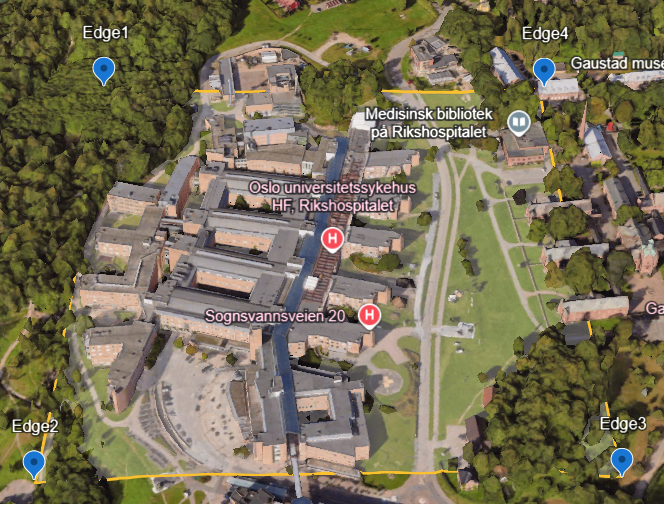

In [1]:

%load_ext autoreload
%autoreload 2

from IPython.display import Image

Image(filename='oslo2.png') 


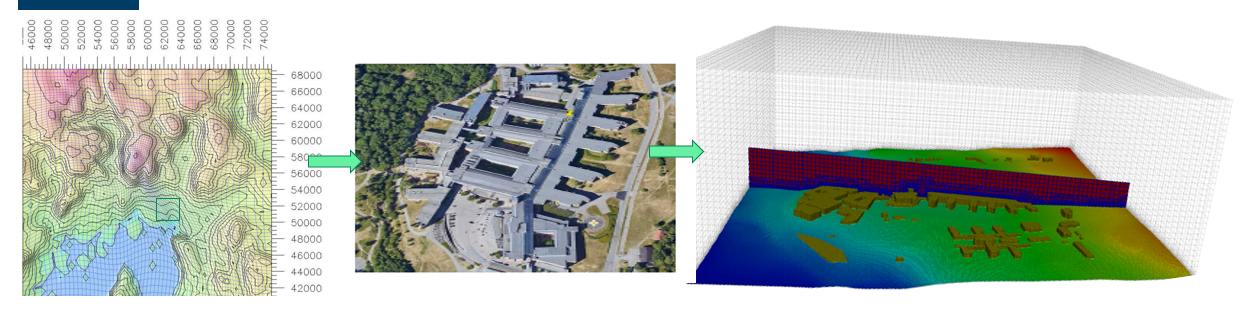

In [2]:
Image(filename='oslo.png') 

## The AI model is trained to predict urban scale wind and turbulence on a segment of Oslo city as shown in the two figures above.

#### Load libraries after adding relative path. 

In [6]:
# Install requirements !pip install -r requirements.txt
 

import os,sys 
current_dir = os.getcwd()    # Get the current directory. 
sys.path.append(current_dir) #Append to path so that libimport library is detected.
fn2=os.path.join(current_dir, 'data_oslo_input') #Define path to store the results.

sys.path.append(fn2)

import libimportoslo
import pandas as pd
import math
import numpy as np
import random
import requests

# Demonstration based on user input 

### Step 1. USER INPUT of TIME : DATE AND HOURS in 'YYYY-MM-DD HR:MIN:SEC' FORMAT for wind prediction. 
#### Input should be for future time upto 3 days

In [8]:


date_and_hrs_only = '2024-10-29 09:00:00' 


### Step 2. USER INPUT of DRONE TRAJECTORY : LATITUDE AND LONGITUDE AS LIST.
#### Input latitude and longitude should be within the min and maximum range mentioned below. Otherwise - code will throw error as AI is not trained outside this.

In [9]:
need=True 
if need==True:
#For Demo : 10 randomly generated points within the following maximum and minimum.
    random_seed_gen=101
    random.seed(random_seed_gen)
    # Define the minimum and maximum values for latitude and longitude
    min_latitude = 59.9478483
    max_latitude = 59.9510513
    min_longitude =  10.7122942
    max_longitude = 10.7186860

    # Generate 10 random latitude and longitude values within the specified range

    random_coordinates = [(random.uniform(min_latitude, max_latitude),\
                        random.uniform(min_longitude, max_longitude))\
        for _ in range(10)]


### Step 3: RUN AI Model using the user-defined inputs to obtain wind field and turbulence in parts of prague.

In [15]:
Macroscale_ws_wd_prediction, wind_data_near_drone_trajectory,locations_at_high_turbulence,locations_at_high_wind_magnitude,merged_dataframe_U_k_Relative_2_vertiport_reconstructed=libimportoslo.demo(date_and_hrs_only,random_coordinates,fn2,API_KEY = 'fa3e3882b6508618a835169fb753d745',visualization=False)

 
Inputs obtained from Meso-scale open_weather_map for 2024-10-29 09:00:00 is :
wind direction is 195 degrees and wind speed is 0.78 mps
 
  
COMPUTING: AI model is obtaining Wind Velocity and Turbulence in the city region (micro-scale predictions) using the input meso-scale wind direction and wind-speed for selected data and time.
  
Directory '/media/mandart/D/AI4Hydrop_Prague/ROM/data_oslo_input/CSV_Database' created successfully.
CSV file saved successfully: /media/mandart/D/AI4Hydrop_Prague/ROM/data_oslo_input/CSV_Database/k_195_0.78_Output_all.csv
 
Done. VTK reconstruction saved at: /media/mandart/D/AI4Hydrop_Prague/ROM/data_oslo_input/VTK_Database/Recon_VTK_added_all_ws_wdk.vtk
 
Transformation completed. Output saved to: /media/mandart/D/AI4Hydrop_Prague/ROM/data_oslo_input/CSV_Database/k_195_Output_Transformed_all.csv
3.97617611
CSV file saved successfully: /media/mandart/D/AI4Hydrop_Prague/ROM/data_oslo_input/CSV_Database/U_195_0.78_Output_all.csv
 
Done. VTK reconstruction 

*** 

# $\color{red}{\text{RESULTS}} $

## $\color{green}{\text{Result 1 below shows wind data near user-supplied drone trajectory and "locations\_at\_high\_turbulence" DataFrame}} $
 #### " This Dataframe shows locations within the computational domain where turbulence is high (> 0.95 normalized TKE values). The column name below refers to : "
- #### latitude,longitude : lat,long of region with high normalized tke. 
- #### X,Y,Z : Corresponding "distance in meters from the vertiport" for the location.
- #### All Column names are variables : (Turbulent Kinetic Energy (TKE), Velocity_magnitude,  Velocity components (Velocity_X,Velocity_Y, Velocity_Z) and Normalized Velocity_mag and Normalized_TKE ) at the maximum high turbulence drone locations . "
- > ###### Normalized variables between 0 to 1. Value of 1 in normalized variable means high value of TKE or velocity at that location while 0 means lowest value.

In [16]:
wind_data_near_drone_trajectory

,X,Y,Z,latitude,longitude,Velocity_mag,Normalized_Velocity,tke,Normalized_turbulence,Velocity_X_,Velocity_Y_,Velocity_Z_
48809,-112.244898,27.552347,297.618776,59.949648,10.713583,0.001105,0.000000,0.012059,0.009535,0.000638,0.000638,0.000638
81709,153.061224,174.495531,297.618776,59.950970,10.718350,0.001105,0.000000,0.012059,0.009535,0.000638,0.000638,0.000638
68709,51.020408,-9.183449,297.618776,59.949317,10.716517,0.001105,0.000000,0.012059,0.009535,0.000638,0.000638,0.000638
48459,-112.244898,-101.022939,297.618776,59.948491,10.713583,0.547221,0.760420,0.438985,0.377622,0.148048,0.522909,0.064017
71059,71.428571,-64.287143,297.618776,59.948822,10.716883,0.001105,0.000000,0.012059,0.009535,0.000638,0.000638,0.000638
80959,153.061224,-101.022939,297.618776,59.948491,10.718350,0.001105,0.000000,0.012059,0.009535,0.000638,0.000638,0.000638
48309,-112.244898,-156.126633,297.618776,59.947995,10.713583,0.577114,0.802044,0.511364,0.440026,0.158866,0.554500,0.018769
73359,91.836735,-137.758735,297.618776,59.948160,10.717250,0.001105,0.000000,0.012059,0.009535,0.000638,0.000638,0.000638
61109,-10.204082,-45.919245,297.618776,59.948987,10.715417,0.001105,0.000000,0.012059,0.009535,0.000638,0.000638,0.000638
68559,51.020408,-64.287143,297.618776,59.948822,10.716517,0.001105,0.000000,0.012059,0.009535,0.000638,0.000638,0.000638


In [ ]:
locations_at_high_turbulence

*** 

*** 

## $\color{green}{\text{Result 2 below.  "locations\_at\_high\_wind\_magnitude" DataFrame}} $
 #### " This Dataframe result shows locations within the computational domain where wind magnitude is high (> 0.95 normalized wind velocity magnitude values). The column name below refers to : "
- #### latitude,longitude : lat,long of region with high normalized wind velocity magnitude. 
- #### X,Y,Z : Corresponding "distance in meters from the vertiport" for the location.
- #### All Column names are variables : (Turbulent Kinetic Energy (TKE), Velocity_magnitude,  Velocity components (Velocity_X,Velocity_Y, Velocity_Z) and Normalized Velocity_mag and Normalized_TKE ) at the maximum high turbulence drone locations . "
- > ###### Normalized variables between 0 to 1. Value of 1 in normalized variable means high value of TKE or velocity at that location while 0 means lowest value.

In [ ]:
locations_at_high_wind_magnitude

*** 

*** 

## $\color{green}{\text{Result 3. More Detailed Reports : See VTK and CSV}} $


# In case more detailed results are required (like, flow at all locations in the parts of city, then open the VTK generated files using free paraview open-source software.

*** 

*** 

## $\color{green}{\text{Result 4. Comparison of AI micro-scale vs Meso-scale predictions Vs CFD micro-scale}} $


In [ ]:
#Meso-scale data results at specificied drone path (all are same).

#Note: ws=Velocity_mag
#Note: wd=wind direction

Macroscale_ws_wd_prediction

 ##  *************************************** END ************************************************************''

***

***

## Ends here 
##################################################################################3.